# $\alpha−\alpha$ correlations as the fingerprints of the rescue mechanism

This notebook contains the experimental correlations between genes segments, and the simulation accompanying the results.

In [2]:
# Experiment selection : 
exp="exp3"

In [3]:
from __future__ import division, print_function
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, Math, Latex
from math import log, sqrt
import editdistance
import random


filepairsab = "../Datas/"+exp+"/pairs_ab.tsv.gz"
filepairsaa = "../Datas/"+exp+"/pairs_aa.tsv.gz"
filepairsbb = "../Datas/"+exp+"/pairs_bb.tsv.gz"
filea = "../Datas/"+exp+"/sequences_alpha.tsv.gz"
fileb = "../Datas/"+exp+"/sequences_beta.tsv.gz"


In [4]:
posgenesA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Vgenes")
ordered_V_genes = list(posgenesA.name.values)
dfaa = pd.read_csv(filepairsaa, sep='\t')
df = dfaa[dfaa.distance > 20]
dfa = pd.read_csv(filea, sep='\t')
ordered_V_genes = [u for u in ordered_V_genes 
                   if u in df.vname_1.value_counts().keys() 
                   and df.vname_1.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]

posgenesA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Jgenes")
ordered_J_genes = list(posgenesA.name.values)
ordered_J_genes = [u for u in ordered_J_genes 
                   if u in df.jname_1.value_counts().keys() 
                   and df.jname_1.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]


Covaav = {(v1, v2): np.mean((df['vname_1'] == v1) & (df['vname_2'] == v2)) 
     - np.mean((df['vname_1'] == v1))*np.mean((df['vname_2'] == v2))
     for v1 in ordered_V_genes for v2 in ordered_V_genes}
Sigma1 = {v1: np.std(df['vname_1'] == v1) for v1 in ordered_V_genes}
Sigma2 = {v2: np.std(df['vname_2'] == v2) for v2 in ordered_V_genes}

nCov = np.zeros((len(ordered_V_genes),len(ordered_V_genes)))
for k in range(len(ordered_V_genes)):
    for l in range(len(ordered_V_genes)):
        nCov[k,l] = (Covaav[(ordered_V_genes[k],ordered_V_genes[l])]
                       /(Sigma1[ordered_V_genes[k]]
                             *Sigma2[ordered_V_genes[l]])if k>=l else 0.)
indx = ordered_V_genes
uV = pd.DataFrame(nCov, index=indx, columns=indx)


Covaaj = {(j1, j2): np.mean((df['jname_1'] == j1) & (df['jname_2'] == j2)) 
     - np.mean((df['jname_1'] == j1))*np.mean((df['jname_2'] == j2))
     for j1 in ordered_J_genes for j2 in ordered_J_genes}
Sigma1 = {j1: np.std(df['jname_1'] == j1) for j1 in ordered_J_genes}
Sigma2 = {j2: np.std(df['jname_2'] == j2) for j2 in ordered_J_genes}
nCov = np.zeros((len(ordered_J_genes),len(ordered_J_genes)))
for k in range(len(ordered_J_genes)):
    for l in range(len(ordered_J_genes)):
        nCov[k,l] = (Covaaj[(ordered_J_genes[k],ordered_J_genes[l])]
                     /(Sigma1[ordered_J_genes[k]]
                           *Sigma2[ordered_J_genes[l]])if k>=l else 0.)
indx = ordered_J_genes
uJ = pd.DataFrame(nCov, index=indx, columns=indx)

Covaavj = {(v1, j2): np.mean((df['vname_1'] == v1) & (df['jname_2'] == j2)) 
     - np.mean((df['vname_1'] == v1))*np.mean((df['jname_2'] == j2))
     for v1 in ordered_V_genes for j2 in ordered_J_genes}
Sigma1 = {v1: np.std(df['vname_1'] == v1) for v1 in ordered_V_genes}
Sigma2 = {j2: np.std(df['jname_2'] == j2) for j2 in ordered_J_genes}
nCov = np.zeros((len(ordered_V_genes),len(ordered_J_genes)))
for k in range(len(ordered_V_genes)):
    for l in range(len(ordered_J_genes)):
        nCov[k,l] = (Covaavj[(ordered_V_genes[k],ordered_J_genes[l])]
                     /(Sigma1[ordered_V_genes[k]]
                           *Sigma2[ordered_J_genes[l]])) #if k>=l else 0.)
uVJ = pd.DataFrame(nCov, index=ordered_V_genes, columns=ordered_J_genes)

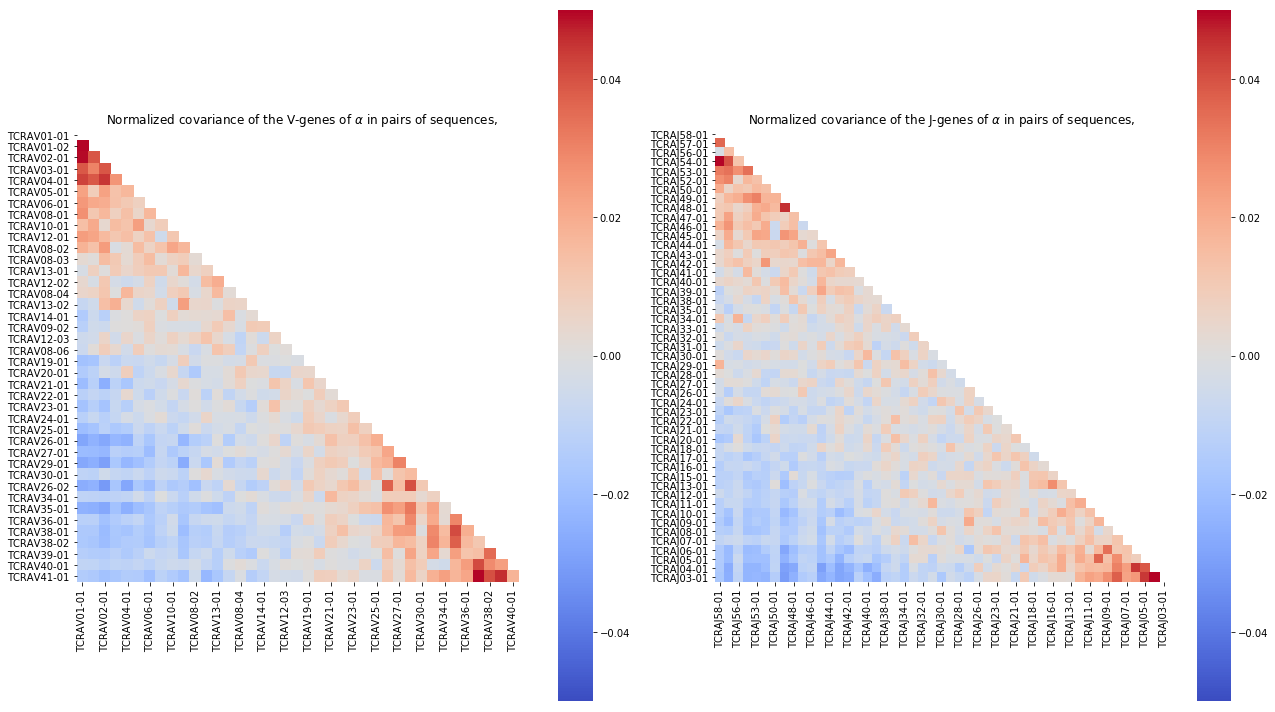

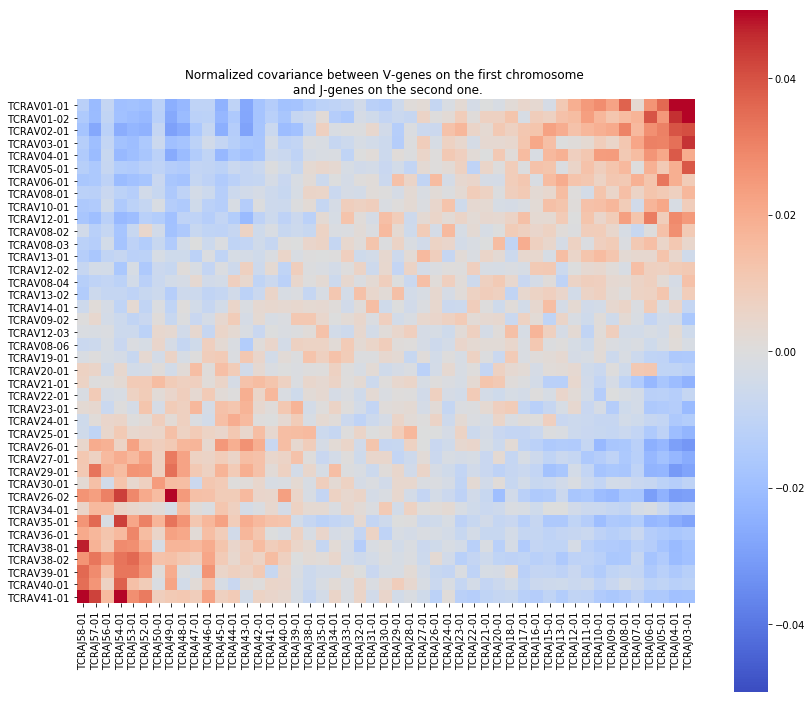

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,10))

mask=np.zeros_like(uV)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(uV, vmin=-0.05, vmax=0.05,mask=mask,cmap="coolwarm",square=True, ax=ax1)
ax1.set_title(r"Normalized covariance of the V-genes of $\alpha$ in pairs of sequences, ")
mask=np.zeros_like(uJ)
mask[np.triu_indices_from(mask)] = True
ax2 = sns.heatmap(uJ, vmin=-0.05, vmax=0.05,mask=mask,cmap="coolwarm", square=True, ax=ax2)
ax2.set_title(r"Normalized covariance of the J-genes of $\alpha$ in pairs of sequences, ")
# mask=np.zeros_like(uJ)
# mask[np.triu_indices_from(mask)] = True

fig2, (ax3) = plt.subplots(1,1,figsize=(12,10))
sns.heatmap(uVJ, vmin=-0.05, vmax=0.05,#mask=mask,
            cmap="coolwarm", square=True, ax=ax3)
ax3.set_title("Normalized covariance between V-genes on the first chromosome \n and J-genes on the second one.")


fig.tight_layout()
fig.savefig("covariance_alpha_alpha.pdf")
fig2.tight_layout()
fig2.savefig("covariance_alpha_alpha_vj.pdf")

plt.show()

## $\beta-\beta$ correlations 

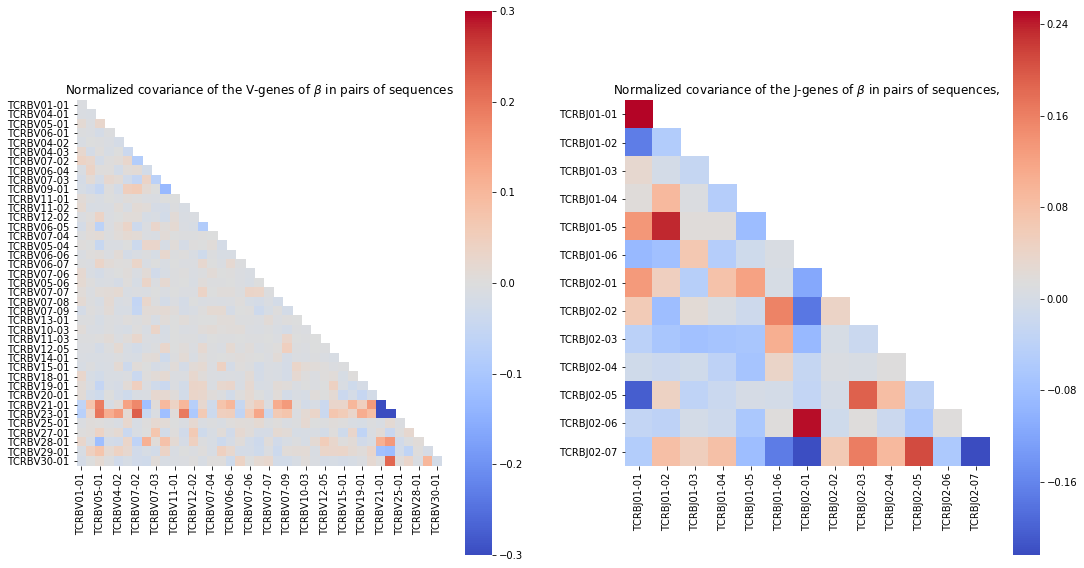

In [5]:
posgenesB = pd.read_csv("../Datas/genes/position_ordered_TCRB_Vgenes")
ordered_V_genes = list(posgenesB.name.values)
df = pd.read_csv(filepairsbb, sep='\t')
df = df[df.distance > 20]
ordered_V_genes = [u for u in ordered_V_genes 
                   if u in df.vname_1.value_counts().keys() and df.vname_1.value_counts()[u] > 20]

posgenesB = pd.read_csv("../Datas/genes/position_ordered_TCRB_Jgenes")
ordered_J_genes = list(posgenesB.name.values)
ordered_J_genes = [u for u in ordered_J_genes 
                   if u in df.jname_1.value_counts().keys() and df.jname_1.value_counts()[u] > 20]



Covbbv = {(v1, v2): np.mean((df['vname_1'] == v1) & (df['vname_2'] == v2)) 
     - np.mean((df['vname_1'] == v1))*np.mean((df['vname_2'] == v2))
     for v1 in ordered_V_genes for v2 in ordered_V_genes}
nCov = np.zeros((len(ordered_V_genes),len(ordered_V_genes)))
for k in range(len(ordered_V_genes)):
    for l in range(len(ordered_V_genes)):
        nCov[k,l] = (Covbbv[(ordered_V_genes[k],ordered_V_genes[l])]
                     /sqrt(0.0001 + Covbbv[(ordered_V_genes[k],ordered_V_genes[k])]
                           *Covbbv[(ordered_V_genes[l],ordered_V_genes[l])])if k>=l else 0.)
indx = ordered_V_genes
u = pd.DataFrame(nCov, index=indx, columns=indx)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,10))
mask=np.zeros_like(u)
mask[np.triu_indices_from(mask,1)] = True
ax1 = sns.heatmap(u,square=True,cmap="coolwarm", vmin=-0.3, vmax=0.3, ax=ax1, mask=mask)
ax1.set_title(r"Normalized covariance of the V-genes of $\beta$ in pairs of sequences")



Covbbj = {(j1, j2): np.mean((df['jname_1'] == j1) & (df['jname_2'] == j2)) 
     - np.mean((df['jname_1'] == j1))*np.mean((df['jname_2'] == j2))
     for j1 in ordered_J_genes for j2 in ordered_J_genes}
nCov = np.zeros((len(ordered_J_genes),len(ordered_J_genes)))
for k in range(len(ordered_J_genes)):
    for l in range(len(ordered_J_genes)):
        nCov[k,l] = (Covbbj[(ordered_J_genes[k],ordered_J_genes[l])]
                     /sqrt(0.0001 + Covbbj[(ordered_J_genes[k],ordered_J_genes[k])]
                           *Covbbj[(ordered_J_genes[l],ordered_J_genes[l])])if k>=l else 0.)
indx = ordered_J_genes
u = pd.DataFrame(nCov, index=indx, columns=indx)
mask=np.zeros_like(u)
mask[np.triu_indices_from(mask,1)] = True
ax2 = sns.heatmap(u,square=True,cmap="coolwarm", ax=ax2, mask=mask)
ax2.set_title(r"Normalized covariance of the J-genes of $\beta$ in pairs of sequences, ")
plt.savefig("covariance_beta_beta.pdf")
plt.show()

## Modelisation of the rescue mechanism

Modelisation of the rescue mechanism

In [11]:
posgenesV = pd.read_csv("../Datas/genes/position_ordered_TCRA_Vgenes")
ordered_V_genes = list(posgenesV.name.values)
posgenesJ = pd.read_csv("../Datas/genes/position_ordered_TCRA_Jgenes")
ordered_J_genes = list(posgenesJ.name.values)

ordered_V_genes = [u for u in ordered_V_genes
                   if u in df.vname_1.value_counts().keys()
                   and df.vname_1.value_counts()[u] > 50
                   and u[0:4] != "TCRD"]
ordered_J_genes = [u for u in ordered_J_genes
                   if u in df.jname_1.value_counts().keys()
                   and df.jname_1.value_counts()[u] > 50
                   and u[0:4] != "TCRD"]

def is_success(Pr):
    return random.random() < Pr

def randomV(lastV, pgeomV):
    lV = len(ordered_V_genes)
    a = lV
    while(a >= lV):
        a = lastV + np.random.geometric(pgeomV)-1
    return a

def randomJ(lastJ, pgeomJ):
    lJ = len(ordered_J_genes)
    a = lJ
    while(a >= lJ):
        a = lastJ + np.random.geometric(pgeomJ)-1
    return a


def random_generation_rescue(Nr, pgeomV, pgeomJ, Pr):
    V1 = J1 = V2 = J2 = -1
    nb_exp = 1
    success = False
    while(nb_exp <= Nr and not success):
        nb_exp += 1
        V1 = randomV(V1, pgeomV);
        J1 = randomJ(J1, pgeomJ)
        success = success or is_success(Pr)
        V2 = randomV(V2, pgeomV);
        J2 = randomJ(J2, pgeomJ)
        success = success or is_success(Pr)
    if success:
        return (V1,J1,V2,J2)
    else:
        return None

def experiment(nb_gen, Nr, pgeomV, pgeomJ, Pr):
    nb = 0
    pVn1n2 = np.zeros((len(ordered_V_genes), len(ordered_V_genes)))
    pJn1n2 = np.zeros((len(ordered_J_genes), len(ordered_J_genes)))
    pVJ = np.zeros((len(ordered_V_genes), len(ordered_J_genes)))
    while(nb < nb_gen):
        result = random_generation_rescue(Nr, pgeomV, pgeomJ, Pr)
        if(result != None):
            nb += 1
            V1, J1, V2, J2 = result
            pVn1n2[V1, V2] += 1
            pJn1n2[J1, J2] += 1
            pVJ[V1, J1] += 1
    return (pVn1n2/np.sum(pVn1n2), pJn1n2/np.sum(pJn1n2)) 




Optimization of the parameters (slow)

In [7]:
pV_exp = [[np.sum((dfaa.vname_1 == nameV1)&(dfaa.vname_2 == nameV2))/len(dfaa) for nameV1 in ordered_V_genes] 
          for nameV2 in ordered_V_genes]
pJ_exp = [[np.sum((dfaa.jname_1 == nameV1)&(dfaa.jname_2 == nameV2))/len(dfaa) for nameJ1 in ordered_J_genes]
          for nameJ2 in ordered_J_genes]

In [9]:
def fit_function_V(pgeomV):
    if(pgeomV <= 1e-3 or pgeomV > 1.):
        return 1e6
    nb_gen = 100000
    Nr = 5
    Pr = 0.3
    pV_gen, _ = experiment(nb_gen, Nr, pgeomV, 1., Pr)
    return np.linalg.norm(pV_gen-pV_exp)

def fit_function_J(pgeomJ):
    if(pgeomJ <= 1e-3 or pgeomJ > 1.):
        return 1e6
    nb_gen = 100000
    Nr = 5
    Pr = 0.3
    _, pJ_gen = experiment(nb_gen, Nr, 1., pgeomJ, Pr)
    return np.linalg.norm(pJ_gen-pJ_exp)

print("Optimization of the value of the value of p in the geometric distribution (for V)...")
print(optimize.minimize(fit_function_V, x0=0.5, method="Nelder-Mead"))
print("Optimization of the value of the value of p in the geometric distribution (for J)...")
print(optimize.minimize(fit_function_J, x0=0.5, method="Nelder-Mead"))

Optimization of the value of the value of p in the geometric distribution (for V)...


IndexError: index -1 is out of bounds for axis 0 with size 0

In [12]:
nb_gen = 1000000
Nr = 5
pgeomV = 0.08
pgeomJ = 0.05
Pr = 0.3

pVn1n2, pJn1n2 = experiment(nb_gen, Nr, pgeomV, pgeomJ, Pr)

pVn = np.sum(pVn1n2, axis=0)/np.sum(pVn1n2)
pJn = np.sum(pJn1n2, axis=0)/np.sum(pJn1n2)

covVn1n2 = np.array([[(pVn1n2[n1,n2]-pVn[n1]*pVn[n2])/(
    sqrt(pVn[n1]*pVn[n2]*(1-pVn[n1])*(1-pVn[n2])) + 1e-14)
                    if n1 <= n2 else 0
                     for n1 in range(len(ordered_V_genes))]
                     for n2 in range(len(ordered_V_genes))]
                     )


covJn1n2 = np.array([[(pJn1n2[n1,n2]-pJn[n1]*pJn[n2])/(
    sqrt(pJn[n1]*pJn[n2]*(1-pJn[n1])*(1-pJn[n2])) + 1e-14)
                    if n1 <= n2 else 0
                     for n1 in range(len(ordered_J_genes))]
                     for n2 in range(len(ordered_J_genes))]
                     )

indx = ordered_J_genes
simJ = pd.DataFrame(covJn1n2, index=indx, columns=indx)

indx = ordered_V_genes
simV = pd.DataFrame(covVn1n2, index=indx, columns=indx)

sns.set_style(style='white')
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
mask=np.zeros_like(simV)
mask[np.triu_indices_from(mask, k=1)] = True
sns.heatmap(simV, vmin=-0.03, vmax=0.03,
            mask=mask,
            cmap="coolwarm",
            ax=ax1,square=True)

mask=np.zeros_like(simJ)
mask[np.triu_indices_from(mask, k=1)] = True
sns.heatmap(simJ, vmin=-0.03, vmax=0.03,
            mask=mask,
            cmap="coolwarm",
            ax=ax2,square=True)

plt.tight_layout()
plt.savefig("correlation_gen.pdf")
plt.show()

IndexError: index -1 is out of bounds for axis 0 with size 0

## $\beta$-$\alpha$ correlation

In [15]:
posgenesVA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Vgenes")
ordered_V_genes_A = list(posgenesVA.name.values)
posgenesVB = pd.read_csv("../Datas/genes/position_ordered_TCRB_Vgenes")
ordered_V_genes_B = list(posgenesVB.name.values)

df = pd.read_csv(filepairsab, sep='\t')

ordered_V_genes_A = [u for u in ordered_V_genes_A 
                   if u in df.vname_1.value_counts().keys() 
                   and df.vname_1.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]
ordered_V_genes_B = [u for u in ordered_V_genes_B 
                   if u in df.vname_2.value_counts().keys() 
                   and df.vname_2.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]

posgenesJA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Jgenes")
ordered_J_genes_A = list(posgenesJA.name.values)
posgenesJB = pd.read_csv("../Datas/genes/position_ordered_TCRB_Jgenes")
ordered_J_genes_B = list(posgenesJB.name.values)

ordered_J_genes_A = [u for u in ordered_J_genes_A 
                   if u in df.jname_1.value_counts().keys() 
                   and df.jname_1.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]
ordered_J_genes_B = [u for u in ordered_J_genes_B 
                   if u in df.jname_2.value_counts().keys() 
                   and df.jname_2.value_counts()[u] > 50 
                   and u[0:4] != "TCRD"]


Covabv = {(v1, v2): np.mean((df['vname_1'] == v1) & (df['vname_2'] == v2)) 
     - np.mean((df['vname_1'] == v1))*np.mean((df['vname_2'] == v2))
     for v1 in ordered_V_genes_A for v2 in ordered_V_genes_B}
Sigma1 = {v1: np.std(df['vname_1'] == v1) for v1 in ordered_V_genes_A}
Sigma2 = {v2: np.std(df['vname_2'] == v2) for v2 in ordered_V_genes_B}

nCov = np.zeros((len(ordered_V_genes_A),len(ordered_V_genes_B)))
for k in range(len(ordered_V_genes_A)):
    for l in range(len(ordered_V_genes_B)):
        nCov[k,l] = (Covabv[(ordered_V_genes_A[k],ordered_V_genes_B[l])]
                       /(Sigma1[ordered_V_genes_A[k]]
                             *Sigma2[ordered_V_genes_B[l]]))
uV = pd.DataFrame(nCov, index=ordered_V_genes_A, columns=ordered_V_genes_B)


Covabj = {(j1, j2): np.mean((df['jname_1'] == j1) & (df['jname_2'] == j2)) 
     - np.mean((df['jname_1'] == j1))*np.mean((df['jname_2'] == j2))
     for j1 in ordered_J_genes_A for j2 in ordered_J_genes_B}
Sigma1 = {j1: np.std(df['jname_1'] == j1) for j1 in ordered_J_genes_A}
Sigma2 = {j2: np.std(df['jname_2'] == j2) for j2 in ordered_J_genes_B}

nCov = np.zeros((len(ordered_J_genes_A),len(ordered_J_genes_B)))
for k in range(len(ordered_J_genes_A)):
    for l in range(len(ordered_J_genes_B)):
        nCov[k,l] = (Covabj[(ordered_J_genes_A[k],ordered_J_genes_B[l])]
                       /(Sigma1[ordered_J_genes_A[k]]
                             *Sigma2[ordered_J_genes_B[l]]))
uJ = pd.DataFrame(nCov, index=ordered_J_genes_A, columns=ordered_J_genes_B)

Covabvj = {(v1, j2): np.mean((df['vname_1'] == v1) & (df['jname_2'] == j2)) 
     - np.mean((df['vname_1'] == v1))*np.mean((df['jname_2'] == j2))
     for v1 in ordered_V_genes_A for j2 in ordered_J_genes_B}
Sigma1 = {v1: np.std(df['vname_1'] == v1) for v1 in ordered_V_genes_A}
Sigma2 = {j2: np.std(df['jname_2'] == j2) for j2 in ordered_J_genes_B}

nCov = np.zeros((len(ordered_V_genes_A),len(ordered_J_genes_B)))
for k in range(len(ordered_V_genes_A)):
    for l in range(len(ordered_J_genes_B)):
        nCov[k,l] = (Covabvj[(ordered_V_genes_A[k],ordered_J_genes_B[l])]
                       /(Sigma1[ordered_V_genes_A[k]]
                             *Sigma2[ordered_J_genes_B[l]]))
uVJ = pd.DataFrame(nCov, index=ordered_V_genes_A, columns=ordered_J_genes_B)


Covabjv = {(j1, v2): np.mean((df['jname_1'] == j1) & (df['vname_2'] == v2)) 
     - np.mean((df['jname_1'] == j1))*np.mean((df['vname_2'] == v2))
     for j1 in ordered_J_genes_A for v2 in ordered_V_genes_B}
Sigma1 = {j1: np.std(df['jname_1'] == j1) for j1 in ordered_J_genes_A}
Sigma2 = {v2: np.std(df['vname_2'] == v2) for v2 in ordered_V_genes_B}

nCov = np.zeros((len(ordered_J_genes_A),len(ordered_V_genes_B)))
for k in range(len(ordered_J_genes_A)):
    for l in range(len(ordered_V_genes_B)):
        nCov[k,l] = (Covabjv[(ordered_J_genes_A[k],ordered_V_genes_B[l])]
                       /(Sigma1[ordered_J_genes_A[k]]
                             *Sigma2[ordered_V_genes_B[l]]))
uJV = pd.DataFrame(nCov, index=ordered_J_genes_A, columns=ordered_V_genes_B)


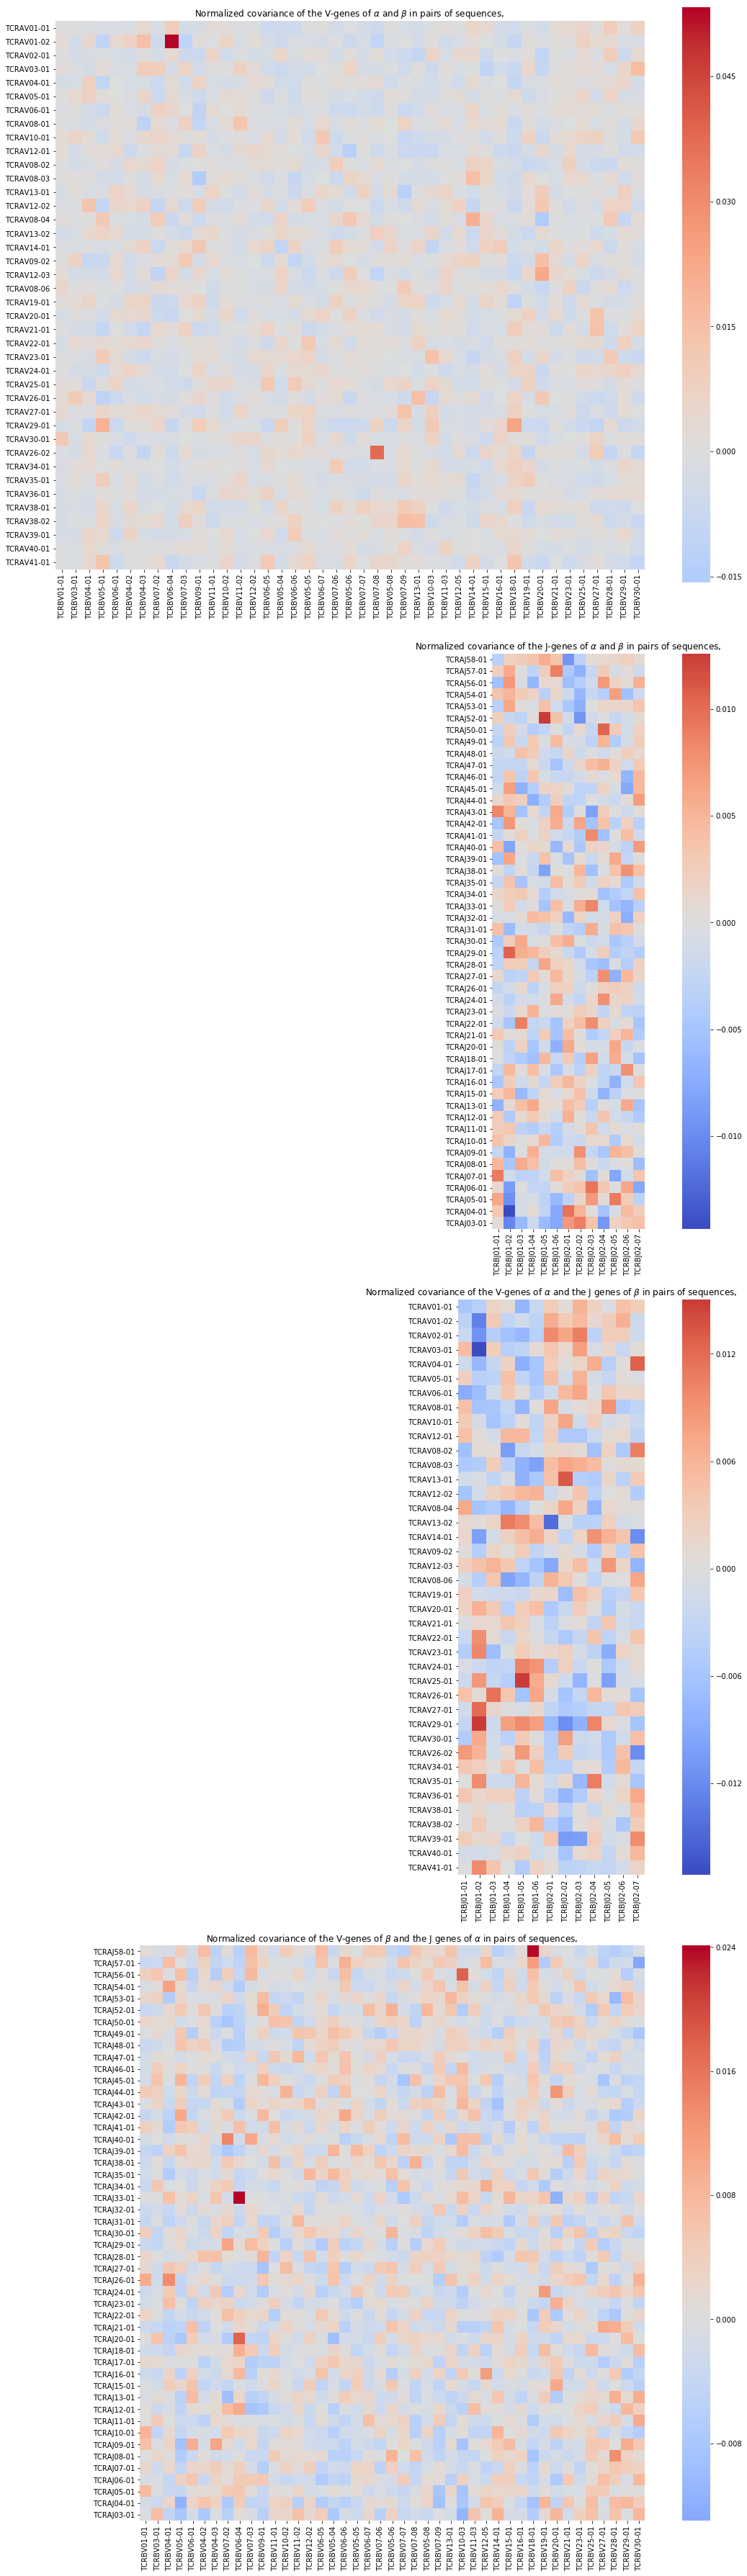

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15, 50))

sns.heatmap(uV, cmap="coolwarm", center=0., square=True, ax=ax1)
ax1.set_title(r"Normalized covariance of the V-genes of $\alpha$ and $\beta$ in pairs of sequences, ")

sns.heatmap(uJ, cmap="coolwarm",square=True, center=0., ax=ax2)
ax2.set_title(r"Normalized covariance of the J-genes of $\alpha$ and $\beta$ in pairs of sequences, ")


sns.heatmap(uVJ, cmap="coolwarm",square=True, center=0., ax=ax3)
ax3.set_title(r"Normalized covariance of the V-genes of $\alpha$ and the J genes of $\beta$ in pairs of sequences, ")


sns.heatmap(uJV, cmap="coolwarm",square=True, center=0., ax=ax4)
ax4.set_title(r"Normalized covariance of the V-genes of $\beta$ and the J genes of $\alpha$ in pairs of sequences, ")

plt.tight_layout()
plt.savefig("correlation_VJ_alpha_beta.pdf")
plt.show()

## Selection model 

The aim of this section is to infer a "minimal selection model", that would only add interactions between the two Vs of the alpha and beta chains. This selection factor is simply inferred from the data by using:
$$
q_{V_A, V_B} = \frac{P_{exp}(V_A, V_B)}{P_{gen}(V_A) P_{gen}(V_B)} 
$$

From this experimental selection factor, we can create a probability model with an adjustable selection level:

$$
P^{T}(V_A, V_B) \propto \left(q_{V_A, V_B}\right)^{T^{-1}} P_{gen}(V_A) P_{gen}(V_B)
$$
Where $T$ is a temperature. There is no selection at $T = \infty$, and $T = 0$ means that only the most common pairs of sequences $(V_A, V_B)$ are selected (maximal selection).

Note that this transformation does not conserve the marginal distribution $p(V_A)$ and $p(V_B)$.
This creates a selection model with a tunable parameter. We can then generate sequences using IGoR and pair them according to the selection factor $q^{T^{-1}}$.

In [46]:
## Load generated sequences
dfa = pd.read_csv("../Datas/generated_sequences/tra_generated/generated_realizations_noerr.csv", sep=";")
mapva = {}
with open("../Datas/generated_sequences/tra_generated/vmap.csv", "r") as f:
    for l in f:
        mapva["(" + l.split(";")[1].strip() + ")"] = l.split(";")[0]
mapja = {}
with open("../Datas/generated_sequences/tra_generated/jmap.csv", "r") as f:
    for l in f:
        mapja["(" + l.split(";")[1].strip() + ")"] = l.split(";")[0]

dfa["v_gene"] = (dfa.GeneChoice_V_gene_Undefined_side_prio7_size103.map(mapva))
dfa["j_gene"] = (dfa.GeneChoice_V_gene_Undefined_side_prio7_size103.map(mapja))

dfb = pd.read_csv("../Datas/generated_sequences/trb_generated/generated_realizations_noerr.csv", sep=";")
mapvb = {}
with open("../Datas/generated_sequences/trb_generated/vmap.csv", "r") as f:
    for l in f:
        mapvb["(" + l.split(";")[1].strip() + ")"] = l.split(";")[0]
mapjb = {}
with open("../Datas/generated_sequences/trb_generated/jmap.csv", "r") as f:
    for l in f:
        mapjb["(" + l.split(";")[1].strip() + ")"] = l.split(";")[0]

dfb["v_gene"] = (dfa.GeneChoice_V_gene_Undefined_side_prio7_size103.map(mapvb))
dfb["j_gene"] = (dfa.GeneChoice_V_gene_Undefined_side_prio7_size103.map(mapjb))





       seq_index GeneChoice_V_gene_Undefined_side_prio7_size103  \
0              0                                           (32)   
1              1                                           (22)   
2              2                                           (23)   
3              3                                           (14)   
4              4                                           (28)   
5              5                                           (32)   
6              6                                            (6)   
7              7                                           (36)   
8              8                                           (73)   
9              9                                           (16)   
10            10                                            (4)   
11            11                                           (16)   
12            12                                           (23)   
13            13                                            (2

The mutual information between the two chains $\alpha$ and $\beta$ seem to be localised between $V_A$ and $V_B$, $V_A$ and $J_B$ and $J_A$ and $V_B$. Given that the mutual information is more important between $V_A$ and $V_B$, it's possible that the correlations $J_A$ - $V_B$ and $J_B$-$V_A$ are only a consequence of the $V_A$-$V_B$ correlation (itself due to selection). From this assumption, we get:

$$
P(J_A \cap V_B) = \sum_{V_A} \frac{P(J_A \cap V_A) P(V_B \cap V_A)}{P(V_A)} 
$$

Assuming this is true we can compute the mutual information of this distribution and compare it with the experimental distribution. 

In [15]:
df = pd.read_csv(filepairsab, sep='\t')
dfaa = pd.read_csv(filepairsaa, sep='\t')

In [16]:
df["va_vb"] = df.apply(lambda r: (r['vname_1'], r['vname_2']), axis=1)
va_vb_vc = df.va_vb.value_counts().to_dict()

pAB = np.array([[(lambda x: va_vb_vc[x] if x in va_vb_vc else 0.)
                 ((ordered_V_genes_A[k1], ordered_V_genes_B[k2]))
               for k2 in range(len(ordered_V_genes_B))]
               for k1 in range(len(ordered_V_genes_A))])
pAB = pAB/np.sum(pAB)
pA = np.array([np.mean(df['vname_1'] == ordered_V_genes_A[k1])
                                     for k1 in range(len(ordered_V_genes_A))])
pB = np.array([np.mean(df['vname_2'] == ordered_V_genes_B[k2])
                                     for k2 in range(len(ordered_V_genes_B))])
pApB = np.tensordot(pA, pB, 0)
qAB = pAB/pApB

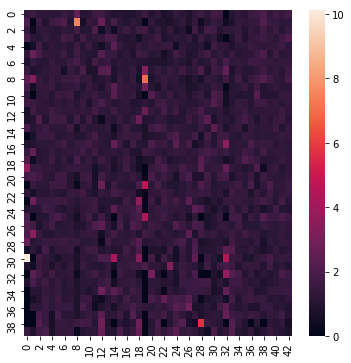

In [17]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.heatmap(qAB)
plt.show()

In [18]:
from collections import Counter
import scipy.optimize

df["va_vb"] = df.apply(lambda r: (r['vname_1'], r['vname_2']), axis=1)
va_vb_vc = df.va_vb.value_counts().to_dict()
pvAvB = np.array([[(lambda x: va_vb_vc[x] if x in va_vb_vc else 0.)
                 ((ordered_V_genes_A[k1], ordered_V_genes_B[k2]))
               for k2 in range(len(ordered_V_genes_B))]
               for k1 in range(len(ordered_V_genes_A))])
pvAvB = pvAvB/np.sum(pvAvB)
pvA = np.sum(pvAvB, axis=1)
pvB = np.sum(pvAvB, axis=0)
pApB = np.tensordot(pvA, pvB, 0)
qAB = pvAvB/pApB

df["ja_vb"] = df.apply(lambda r: (r['jname_1'], r['vname_2']), axis=1)
ja_vb_vc = df.ja_vb.value_counts().to_dict()

pjAvB = np.array([[(lambda x: ja_vb_vc[x] if x in ja_vb_vc else 0.)
                 ((ordered_J_genes_A[k1], ordered_V_genes_B[k2]))
               for k2 in range(len(ordered_V_genes_B))]
               for k1 in range(len(ordered_J_genes_A))])
pjAvB = pjAvB/np.sum(pjAvB)

dfaa["ja_va"] = dfaa.apply(lambda r: (r['jname_1'], r['vname_2']), axis=1)
ja_va_vc = dfaa.ja_va.value_counts().to_dict()
pjAvA = np.array([[(lambda x: ja_va_vc[x]/len(df) if x in ja_va_vc else 0.)
                 ((ordered_J_genes_A[k1], ordered_V_genes_A[k2]))
               for k2 in range(len(ordered_V_genes_A))]
               for k1 in range(len(ordered_J_genes_A))])
pjAvA = pjAvA/np.sum(pjAvA)



def thermal_distribution(T=1., pA=pvA, pB=pvB):
    h = np.power(qAB, 1./T)
    N = h.shape[1]
    # main difficulty, keep the right marginals
    # the algorithm tend to fail catastrophically for T around 0.1
    def marginals(x):
        # 0: A, 1: B
        pt = np.transpose(np.transpose(h*x[:N])*x[N:])
        pt = pt/np.sum(pt)
        return (np.sum(np.abs(np.concatenate(
            (np.sum(pt, axis=0) - pB, np.sum(pt, axis=1) - pA)))))
    
    
    sol = scipy.optimize.minimize(marginals, 
                         np.concatenate((pB, pA)),
                                  bounds = [(0.,1.) for _ in range(len(pA) + len(pB))]
                                 ).x
    p = np.transpose(np.transpose(h*sol[:N])*sol[N:])
    return p/np.sum(p)
#     base=np.transpose((np.transpose(h*pB)*pA))

#     p = p/np.sum(p)
#     c = np.cumsum(p.flatten())
#     idxs_flat = [np.argmax(c > x) 
#                  for x in np.random.random(size=size)]
#     return np.transpose(np.unravel_index(idxs_flat, np.shape(p)))



def h(x):
    return x*np.log2(x) if x != 0. else 0.

def mutual_information_dist(p):
    p0 = np.sum(p, axis=0)
    p1 = np.sum(p, axis=1)
    return sum([h(p[j,i]/(p0[i]*p1[j]))*p0[i]*p1[j] for i in range(len(p0)) 
               for j in range(len(p1))])

# def mutual_information_rv(res):
#     """compute mutual information from numpy array (shape (nb_obs, 2))"""
#     N = res.shape[0]
#     lstAB = [(res[i,0], res[i, 1]) for i in range(N)]
#     pexpAB = {k:v/N for k,v in Counter(lstAB).items()}
#     pexpA = {k: v/N for k,v in Counter(res[:, 0]).items()}
#     pexpB = {k: v/N for k,v in Counter(res[:, 1]).items()}  

#     for kA in pexpA:
#         for kB in pexpB:
#             if (kA, kB) not in pexpAB:
#                 pexpAB[(kA, kB)] = 0.
                
#     return sum([h(pexpAB[kA, kB]/(pexpA[kA]*pexpB[kB]))*(pexpA[kA]*pexpB[kB]) for
#             kA in pexpA for kB in pexpB])
    
# #

In [19]:
mut_inf_vA_vB = []
mut_inf_jA_vB = []
for T in np.arange(0.2, 5., 0.02):
    p = thermal_distribution(T=T)
    pjAvB_no_selection = np.dot(pjAvA, p/pvA[:,None])
    mut_inf_vA_vB.append(mutual_information_dist(p))
    mut_inf_jA_vB.append(mutual_information_dist(pjAvB_no_selection))

/home/tautilde/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


In [20]:
np.sum(pjAvB)

1.0

In [21]:
mutual_information_dist(pjAvB)
mutual_information_dist(pjAvA)


0.21050274933908422

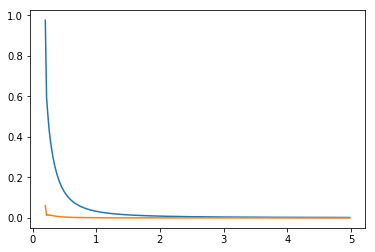

In [22]:
plt.plot(np.arange(0.2, 5., 0.02), mut_inf_vA_vB)
plt.plot(np.arange(0.2, 5., 0.02), mut_inf_jA_vB)
plt.show()

In [23]:
df["ja_vb"] = df.apply(lambda r: (r['jname_1'], r['vname_2']), axis=1)
ja_vb_vc = df.ja_vb.value_counts().to_dict()

pjAvB = np.array([[(lambda x: ja_vb_vc[x]/len(df) if x in ja_vb_vc else 0.)
                 ((ordered_J_genes_A[k1], ordered_V_genes_B[k2]))
               for k2 in range(len(ordered_V_genes_B))]
               for k1 in range(len(ordered_J_genes_A))])

dfaa["ja_va"] = dfaa.apply(lambda r: (r['jname_1'], r['vname_2']), axis=1)
ja_va_vc = dfaa.ja_va.value_counts().to_dict()
pjAvA = np.array([[(lambda x: ja_va_vc[x]/len(df) if x in ja_va_vc else 0.)
                 ((ordered_J_genes_A[k1], ordered_V_genes_A[k2]))
               for k2 in range(len(ordered_V_genes_A))]
               for k1 in range(len(ordered_J_genes_A))])



In [24]:
print(len(ordered_V_genes_A))
print(len(ordered_J_genes_A))
print(len(ordered_V_genes_B))

40
49
43


In [25]:
pjAvB_no_selection = np.dot(pjAvA, pAB/pA[:,None])

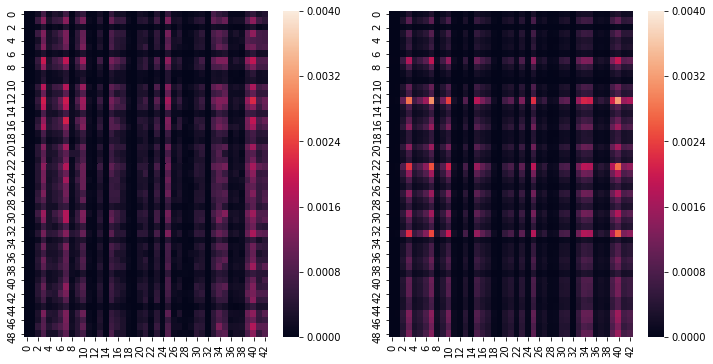

In [26]:
pjAvB_no_selection = np.dot(pjAvA, pvAvB/pvA[:,None])
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(pjAvB, ax=axes[0], vmin=0., vmax=0.004)
sns.heatmap(pjAvB_no_selection, ax=axes[1], vmin=0., vmax=0.004)
plt.show()


In [27]:
import itertools

df = pd.read_csv(filepairsab, sep='\t')
pVV = {(v1, v2): np.mean((df['vname_1'] == v1) & (df['vname_2'] == v2))
       for v1 in ordered_V_genes_A for v2 in ordered_V_genes_B}
pVA = {}

cVV = np.cumsum(list(pVV.values()))
keys = list(pVV.keys())
   
nb_V_A = {ordered_V_genes_A[k]:k for k in range(len(ordered_V_genes_A))}
nb_V_B = {ordered_V_genes_B[k]:k for k in range(len(ordered_V_genes_B))}

def random_pair(size=1):
    return [keys[np.argmax(cVV > a*cVV[-1])] for a in np.random.random(size=size)]

def name_to_index(p):
    p_np = np.zeros((len(ordered_V_genes_A), len(ordered_V_genes_B)))
    for k1 in range(len(ordered_V_genes_A)):
        for k2 in range(len(ordered_V_genes_B)):
            p_np[k1, k2] = p[(ordered_V_genes_A[k1], ordered_V_genes_B[k2])]
    return p_np

In [28]:
p = {(v1, v2):0 for v1 in ordered_V_genes_A for v2 in ordered_V_genes_B}
for a in random_pair(100000):
        p[a] += 1

p_np = name_to_index(p)
p_np = p_np/np.sum(p_np)

In [29]:
sns.heatmap(name_to_index(pVV), ax=ax2)

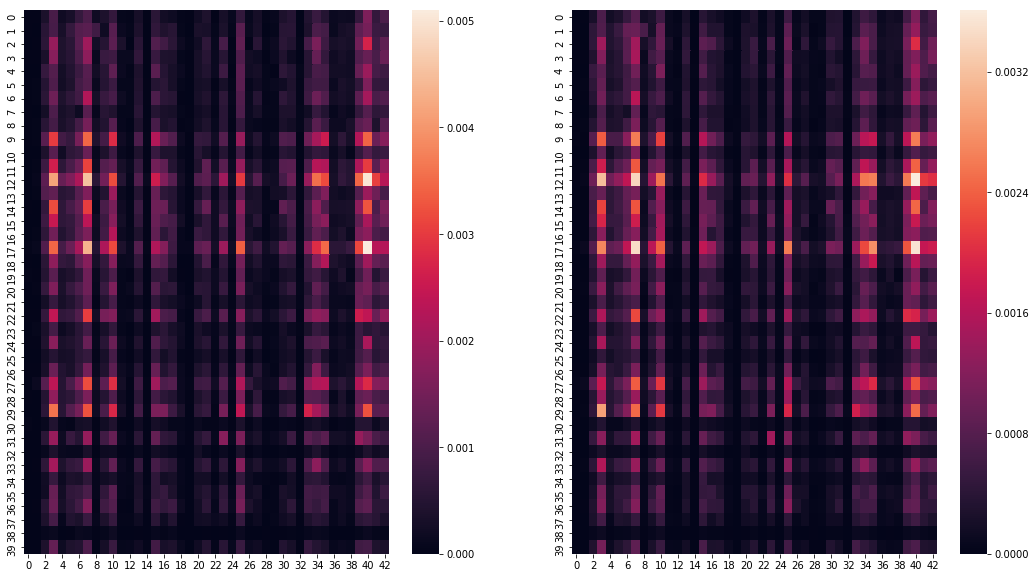

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,10))
sns.heatmap(p_np, ax=ax1)
sns.heatmap(name_to_index(pVV), ax=ax2)
plt.show()

In [31]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### V and J usage as a function of position on the germline.

In [4]:
dfa = pd.read_csv(filea, sep="\t")

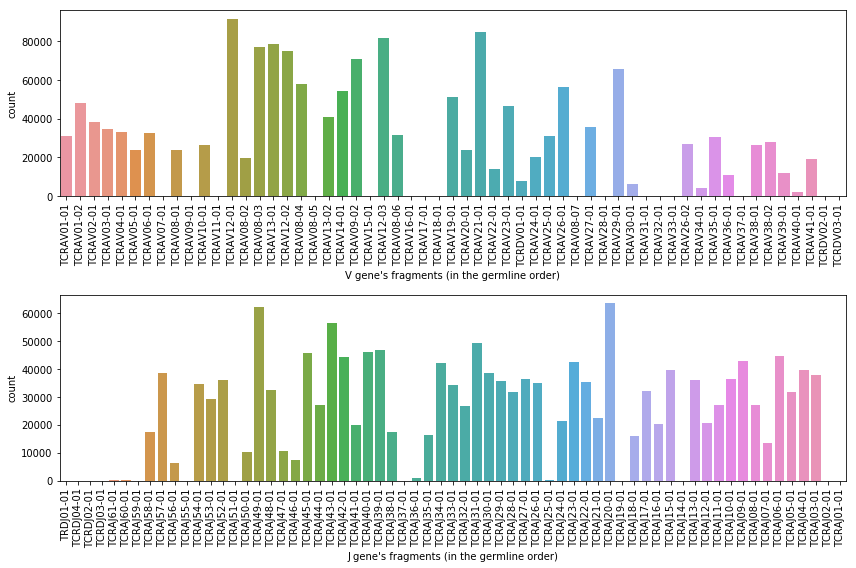

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
posgenesA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Vgenes")
ordered_V_genes = list(posgenesA.name.values)
sns.countplot(dfa.vname, order=ordered_V_genes, ax=ax1)
posgenesA = pd.read_csv("../Datas/genes/position_ordered_TCRA_Jgenes")
ordered_J_genes = list(posgenesA.name.values)
sns.countplot(dfa.jname, order=ordered_J_genes, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax1.set_xlabel("V gene's fragments (in the germline order)")
ax2.set_xlabel("J gene's fragments (in the germline order)")
plt.tight_layout()
plt.savefig("VJ_gene_fragments_distribution.pdf")
plt.show()

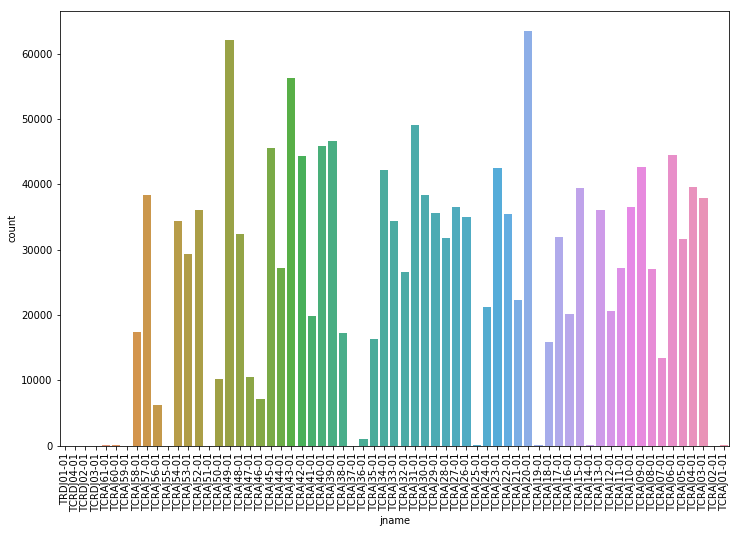